# Trends in US Renewable Energy Consumption

## Objective
This is an EDA in whcih I will explore how US renewable energy consumption has changed between 1973 and 2023. I will also explore trends in the energy mix across various sectors of the economy.

Data source: https://www.kaggle.com/datasets/alistairking/renewable-energy-consumption-in-the-u-s/data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap

In [2]:
# import data
df = pd.read_csv('US_renewable_energy_consumption.csv')

### Data verification and cleaning

In [3]:
df.head(15)

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
0,1973,1,Commerical,0.000,0.000,0.0,0.0,0.570,0.000,0.0,0.0,0.570,0.570,0.0,0.0,0.000,0.0
1,1973,1,Electric Power,0.000,0.490,0.0,0.0,0.054,0.157,0.0,0.0,0.211,89.223,0.0,0.0,88.522,0.0
2,1973,1,Industrial,1.040,0.000,0.0,0.0,98.933,0.000,0.0,0.0,98.933,99.973,0.0,0.0,0.000,0.0
3,1973,1,Residential,0.000,0.000,0.0,0.0,30.074,0.000,0.0,0.0,0.000,30.074,0.0,0.0,0.000,0.0
4,1973,1,Transportation,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0
5,1973,2,Commerical,0.000,0.000,0.0,0.0,0.515,0.000,0.0,0.0,0.515,0.515,0.0,0.0,0.000,0.0
6,1973,2,Electric Power,0.000,0.448,0.0,0.0,0.157,0.144,0.0,0.0,0.301,79.331,0.0,0.0,78.582,0.0
7,1973,2,Industrial,0.962,0.000,0.0,0.0,89.359,0.000,0.0,0.0,89.359,90.320,0.0,0.0,0.000,0.0
8,1973,2,Residential,0.000,0.000,0.0,0.0,27.164,0.000,0.0,0.0,0.000,27.164,0.0,0.0,0.000,0.0
9,1973,2,Transportation,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0


In [4]:
df.tail(10)

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
3055,2023,12,Commerical,0.000,1.673,3.913,0.037,7.003,6.396,2.653,0.000,16.051,21.739,0.000,0.000,0.000,0.000
3056,2023,12,Electric Power,0.000,4.821,31.162,130.846,11.910,15.135,0.000,0.000,27.044,259.513,0.000,0.000,65.640,0.000
3057,2023,12,Industrial,0.269,0.357,0.942,0.037,104.598,14.357,1.666,74.073,194.694,196.299,0.000,0.000,0.000,0.000
3058,2023,12,Residential,0.000,3.363,14.658,0.000,38.247,0.000,0.000,0.000,0.000,56.268,0.000,0.000,0.000,0.000
3059,2023,12,Transportation,0.000,0.000,0.000,0.000,0.000,0.000,93.570,0.000,156.234,0.000,38.344,4.101,0.000,20.219
3060,2024,1,Commerical,0.073,1.669,4.267,0.036,7.053,6.233,2.441,0.000,15.728,21.773,0.000,0.000,0.000,0.000
3061,2024,1,Electric Power,0.000,4.667,32.707,119.265,15.071,13.873,0.000,0.000,28.944,257.661,0.000,0.000,72.078,0.000
3062,2024,1,Industrial,0.308,0.356,0.987,0.035,104.878,14.171,1.533,67.742,188.325,190.011,0.000,0.000,0.000,0.000
3063,2024,1,Residential,0.000,3.354,14.897,0.000,34.065,0.000,0.000,0.000,0.000,52.316,0.000,0.000,0.000,0.000
3064,2024,1,Transportation,0.000,0.000,0.000,0.000,0.000,0.000,86.098,0.000,140.188,0.000,30.780,3.442,0.000,19.867


In [5]:
# Confirm there are 12 months of data for each year
df_month_cnt = df.groupby(['Year','Sector']).count()
df_month_cnt[df_month_cnt['Month'] != 12]

Month  Hydroelectric Power  Geothermal Energy  \
Year Sector                                                          
2024 Commerical          1                    1                  1   
     Electric Power      1                    1                  1   
     Industrial          1                    1                  1   
     Residential         1                    1                  1   
     Transportation      1                    1                  1   

                     Solar Energy  Wind Energy  Wood Energy  Waste Energy  \
Year Sector                                                                 
2024 Commerical                 1            1            1             1   
     Electric Power             1            1            1             1   
     Industrial                 1            1            1             1   
     Residential                1            1            1             1   
     Transportation             1            1            1             1   

                     Fuel Ethanol, Excluding Denaturant  \
Year Sector                                               
2024 Commerical                                       1   
     Electric Power                                   1   
     Industrial                                       1   
     Residential                                      1   
     Transportation                                   1   

                     Biomass Losses and Co-products  Biomass Energy  \
Year Sector                                                           
2024 Commerical                                   1               1   
     Electric Power                               1               1   
     Industrial                                   1               1   
     Residential                                  1               1   
     Transportation                               1               1   

                     Total Renewable Energy  Renewable Diesel Fuel  \
Year Sector                                                          
2024 Commerical                           1                      1   
     Electric Power                       1                      1   
     Industrial                           1                      1   
     Residential                          1                      1   
     Transportation                       1                      1   

                     Other Biofuels  Conventional Hydroelectric Power  \
Year Sector                                                             
2024 Commerical                   1                                 1   
     Electric Power               1                                 1   
     Industrial                   1                                 1   
     Residential                  1                                 1   
     Transportation               1                                 1   

                     Biodiesel  
Year Sector                     
2024 Commerical              1  
     Electric Power          1  
     Industrial              1  
     Residential             1  
     Transportation          1

In 2024, there is only data for January, so we'll exclude this year from the analysis.

In [6]:
# Remove 2024 data since it's missing data for all but January
df.drop(df[df['Year']==2024].index, inplace=True)

In [7]:
# Confirm all year-months have 5 sectors
df_sector_cnt = df.groupby(['Year','Month']).count()
df_sector_cnt[df_sector_cnt['Sector'] != 5]

,,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
Year,Month,,,,,,,,,,,,,,,


The data dictionary states that the Total Renewable Energy column should be the sum of Hydroelectric Power, Geothermal, Solar, Wind, and Biomass. Confirm this is true.

In [8]:
total_cols = ['Geothermal Energy', 'Solar Energy', 'Wind Energy', 'Biomass Energy', 
              'Renewable Diesel Fuel', 'Other Biofuels', 'Conventional Hydroelectric Power', 'Biodiesel', 'Hydroelectric Power']

# Confirm that sum of total_cols = Total Renewable Energy
df['Total Check'] = (df[total_cols].sum(axis=1)).round(2) - (df['Total Renewable Energy']).round(2)
df.head(10)

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel,Total Check
0,1973,1,Commerical,0.000,0.000,0.0,0.0,0.570,0.000,0.0,0.0,0.570,0.570,0.0,0.0,0.000,0.0,0.00
1,1973,1,Electric Power,0.000,0.490,0.0,0.0,0.054,0.157,0.0,0.0,0.211,89.223,0.0,0.0,88.522,0.0,0.00
2,1973,1,Industrial,1.040,0.000,0.0,0.0,98.933,0.000,0.0,0.0,98.933,99.973,0.0,0.0,0.000,0.0,0.00
3,1973,1,Residential,0.000,0.000,0.0,0.0,30.074,0.000,0.0,0.0,0.000,30.074,0.0,0.0,0.000,0.0,-30.07
4,1973,1,Transportation,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.00
5,1973,2,Commerical,0.000,0.000,0.0,0.0,0.515,0.000,0.0,0.0,0.515,0.515,0.0,0.0,0.000,0.0,0.00
6,1973,2,Electric Power,0.000,0.448,0.0,0.0,0.157,0.144,0.0,0.0,0.301,79.331,0.0,0.0,78.582,0.0,0.00
7,1973,2,Industrial,0.962,0.000,0.0,0.0,89.359,0.000,0.0,0.0,89.359,90.320,0.0,0.0,0.000,0.0,0.00
8,1973,2,Residential,0.000,0.000,0.0,0.0,27.164,0.000,0.0,0.0,0.000,27.164,0.0,0.0,0.000,0.0,-27.16
9,1973,2,Transportation,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.00


Some rows don't add up as they should according to the data dictionary. There seems to be something inconsistent about whether Wood Energy is included as part of Biomass Energy. According to the data dictionary, the Biomass Energy column is the sum of Wood, Waste, Ethanol, and Losses/Co-products. Confirm this is true.

In [9]:
biomass_cols = ['Wood Energy', 'Waste Energy', 'Fuel Ethanol, Excluding Denaturant', 'Biomass Losses and Co-products']

# Confirm that sum of biomass_cols = Biomass Energy
df['Biomass Check'] = (df[biomass_cols].sum(axis=1)).round(2) - (df['Biomass Energy']).round(2)
df.head(10)

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel,Total Check,Biomass Check
0,1973,1,Commerical,0.000,0.000,0.0,0.0,0.570,0.000,0.0,0.0,0.570,0.570,0.0,0.0,0.000,0.0,0.00,0.00
1,1973,1,Electric Power,0.000,0.490,0.0,0.0,0.054,0.157,0.0,0.0,0.211,89.223,0.0,0.0,88.522,0.0,0.00,0.00
2,1973,1,Industrial,1.040,0.000,0.0,0.0,98.933,0.000,0.0,0.0,98.933,99.973,0.0,0.0,0.000,0.0,0.00,0.00
3,1973,1,Residential,0.000,0.000,0.0,0.0,30.074,0.000,0.0,0.0,0.000,30.074,0.0,0.0,0.000,0.0,-30.07,30.07
4,1973,1,Transportation,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.00,0.00
5,1973,2,Commerical,0.000,0.000,0.0,0.0,0.515,0.000,0.0,0.0,0.515,0.515,0.0,0.0,0.000,0.0,0.00,0.00
6,1973,2,Electric Power,0.000,0.448,0.0,0.0,0.157,0.144,0.0,0.0,0.301,79.331,0.0,0.0,78.582,0.0,0.00,0.00
7,1973,2,Industrial,0.962,0.000,0.0,0.0,89.359,0.000,0.0,0.0,89.359,90.320,0.0,0.0,0.000,0.0,0.00,0.00
8,1973,2,Residential,0.000,0.000,0.0,0.0,27.164,0.000,0.0,0.0,0.000,27.164,0.0,0.0,0.000,0.0,-27.16,27.16
9,1973,2,Transportation,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.00,0.00


This check failed. The problem appears to be that for some rows, the value for Wood Energy is not included in total found in Biomass Energy. Fix this by replacing the Biomass Energy column with a sum that reflects the dictionary definition. Then replace the Total Renewable Energy to reflect the updated Biomass Energy column, and re-check the Total.

In [10]:
# Replace 'Biomass Energy' columns since it doesn't reliably include 'Wood Energy'
df['Biomass Energy'] = df[biomass_cols].sum(axis=1)

# Replace 'Total Renewable Energy' column to include the newly calculated 'Biomass Energy' column
df['Total Renewable Energy'] = df[total_cols].sum(axis=1)

# Re-confirm that sum of total_cols = Total Renewable Energy
df['Total Check'] = (df[total_cols].sum(axis=1)).round(2) - (df['Total Renewable Energy']).round(2)

df.head(20)

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel,Total Check,Biomass Check
0,1973,1,Commerical,0.000,0.000,0.0,0.0,0.570,0.000,0.0,0.0,0.570,0.570,0.0,0.0,0.000,0.0,0.0,0.00
1,1973,1,Electric Power,0.000,0.490,0.0,0.0,0.054,0.157,0.0,0.0,0.211,89.223,0.0,0.0,88.522,0.0,0.0,0.00
2,1973,1,Industrial,1.040,0.000,0.0,0.0,98.933,0.000,0.0,0.0,98.933,99.973,0.0,0.0,0.000,0.0,0.0,0.00
3,1973,1,Residential,0.000,0.000,0.0,0.0,30.074,0.000,0.0,0.0,30.074,30.074,0.0,0.0,0.000,0.0,0.0,30.07
4,1973,1,Transportation,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.00
5,1973,2,Commerical,0.000,0.000,0.0,0.0,0.515,0.000,0.0,0.0,0.515,0.515,0.0,0.0,0.000,0.0,0.0,0.00
6,1973,2,Electric Power,0.000,0.448,0.0,0.0,0.157,0.144,0.0,0.0,0.301,79.331,0.0,0.0,78.582,0.0,0.0,0.00
7,1973,2,Industrial,0.962,0.000,0.0,0.0,89.359,0.000,0.0,0.0,89.359,90.321,0.0,0.0,0.000,0.0,0.0,0.00
8,1973,2,Residential,0.000,0.000,0.0,0.0,27.164,0.000,0.0,0.0,27.164,27.164,0.0,0.0,0.000,0.0,0.0,27.16
9,1973,2,Transportation,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.00


Now the data are clean and ready to analyze.

### Exploratory Data Analysis

In [11]:
# Collapse data to yearly totals
df_yr = df.groupby(['Year', 'Sector']).sum().reset_index()
df_yr.drop(['Month'], axis=1, inplace=True)

# Melt data to long format
df_yr_long = pd.melt(df_yr,
                      id_vars=['Year','Sector'],
                      value_vars=total_cols,
                      var_name='Renewable Energy Source',
                      value_name='Energy Consumption')

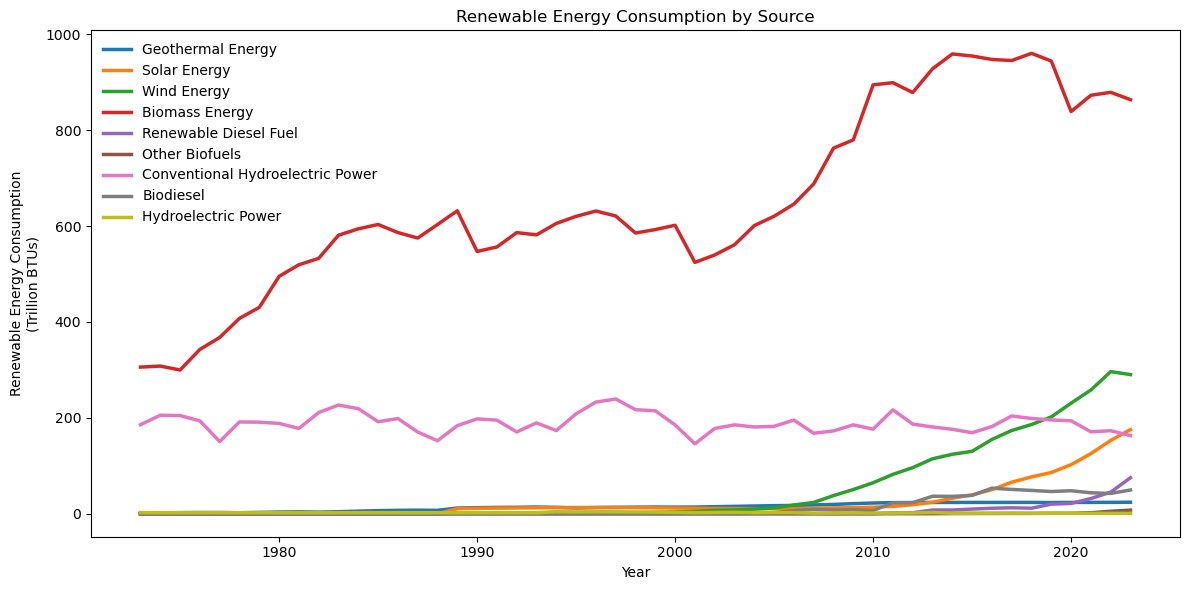

In [12]:
# Plot Total Renewable Energy Consumption by Type and Sector
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_yr_long, x='Year', y='Energy Consumption', hue='Renewable Energy Source', 
             errorbar=None, linewidth=2.5)
plt.xlabel('Year')
plt.ylabel('\n'.join(wrap('Renewable Energy Consumption (Trillion BTUs)', width=30)))
plt.title('Renewable Energy Consumption by Source')
legend = plt.legend(loc='upper left')
legend.get_frame().set_edgecolor('none') 
legend.get_frame().set_facecolor('none')
plt.tight_layout()
plt.show()

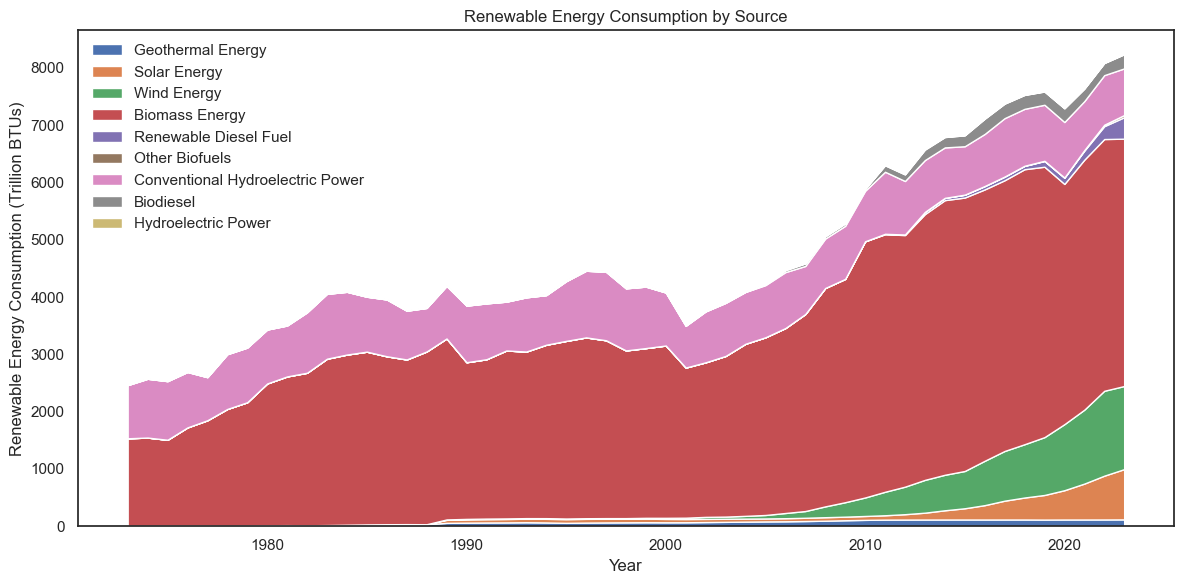

In [13]:
sns.set_theme(style='white')

# Prepare data for plotting by source
years = df_yr['Year'].unique()
source_data = {col: df_yr.groupby('Year')[col].sum().values for col in total_cols}

# Plot Renewable Energy Usage Per Year By Source as Stackplot
plt.figure(figsize=(12, 6))
plt.stackplot(years, source_data.values(), labels=source_data.keys())
plt.title('Renewable Energy Consumption by Source')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Consumption (Trillion BTUs)')
legend = plt.legend(loc='upper left')
legend.get_frame().set_edgecolor('none') 
legend.get_frame().set_facecolor('none')
plt.tight_layout()
plt.show()

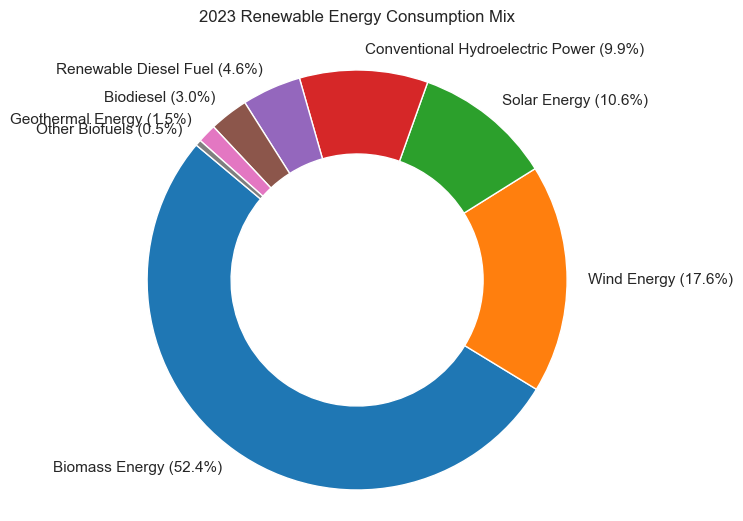

In [14]:
# Filter data for the year 2023
df_2023 = df[df['Year'] == 2023]

# Exclude data for "Hydroelectric Power" since it's 0%
df_2023 = df_2023.drop(columns=['Hydroelectric Power'])
total_cols_nonzero = [col for col in total_cols if col != 'Hydroelectric Power']

# Sum the values for each energy source in total_cols for the year 2023
total_2023 = df_2023[total_cols_nonzero].sum()

# Create a pie chart
# Calculate percentages
percentages = (total_2023 / total_2023.sum()) * 100

# Create labels with percentages
labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(total_2023.index, percentages)]

# Sort the data by relative size
sorted_total_2023 = total_2023.sort_values(ascending=False)
sorted_labels = [labels[total_2023.index.get_loc(idx)] for idx in sorted_total_2023.index]

plt.figure(figsize=(8, 6))
colors = sns.color_palette("tab10")[0:len(sorted_total_2023)]
plt.pie(sorted_total_2023, labels=sorted_labels, colors=colors, startangle=140, wedgeprops=dict(width=0.4))
plt.title('2023 Renewable Energy Consumption Mix', pad=20)
plt.axis('equal')
plt.show()

### Observations:
- Overall renewable energy consumption has approximately doubled since the early 2000s and appears to be maintaining a upward secular trajectory.
- Biomass energy has remained the predominant form of renewable energy consumed since the beginning of the dataset (1973). There were large drops in consumption in 1990, 2001, and 2020. As of 2023, it accounts for over half of all renewable energy consumption.
- Wind and solar energy consumption have grown substantially, especially since the mid-2000s, and continue to experience year-over-year growth. As of 2023, they account for 28% of total renewable energy consumption.
- Conventional hydroelectric power fluctuates year-over-year but has remained largely steady since 1973.
- Renewable diesel consumption has been increasing over the past few years, but remains a relatively small fraction of overall renewable energy consumption (4.6%).

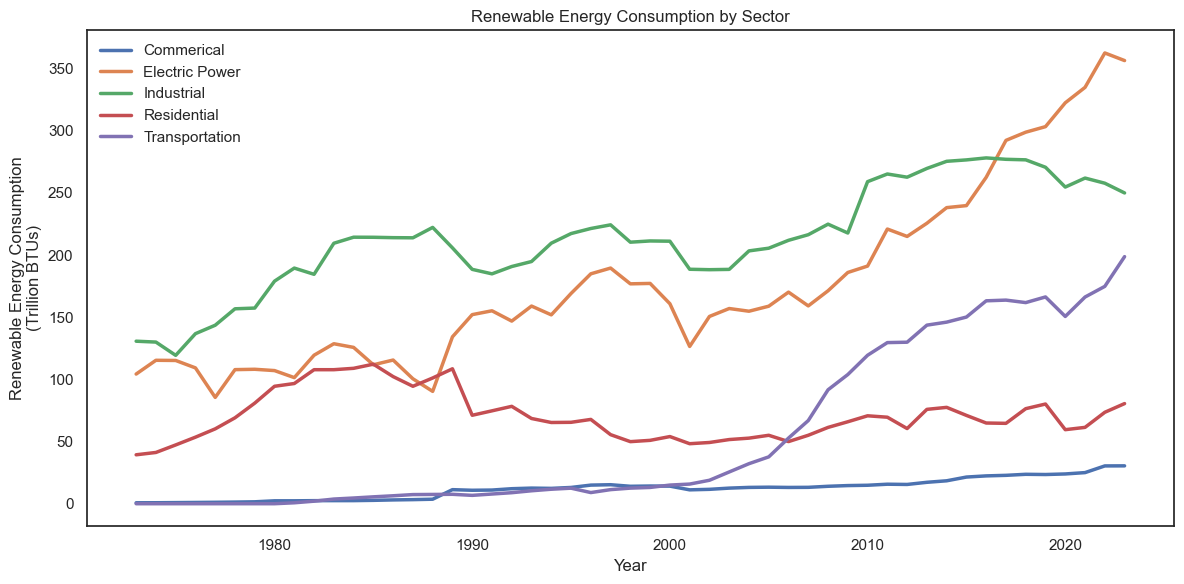

In [15]:
# Plot Renewable Energy Usage Per Year By Sector
# plt.figure(figsize=(12,6))
# sns.lineplot(x='Year', y='Total Renewable Energy', hue='Sector', data=df_yr, errorbar=None, linewidth=2.5)
# plt.title('Renewable Energy Consumption by Sector')
# plt.ylabel('Renewable Energy Consumption (Trillion BTUs)')
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_yr_long, x='Year', y='Energy Consumption', hue='Sector', errorbar=None, linewidth=2.5)
plt.xlabel('Year')
plt.ylabel('\n'.join(wrap('Renewable Energy Consumption (Trillion BTUs)', width=30)))
plt.title('Renewable Energy Consumption by Sector')
legend = plt.legend(loc='upper left')
legend.get_frame().set_edgecolor('none') 
legend.get_frame().set_facecolor('none')
plt.tight_layout()
plt.show()

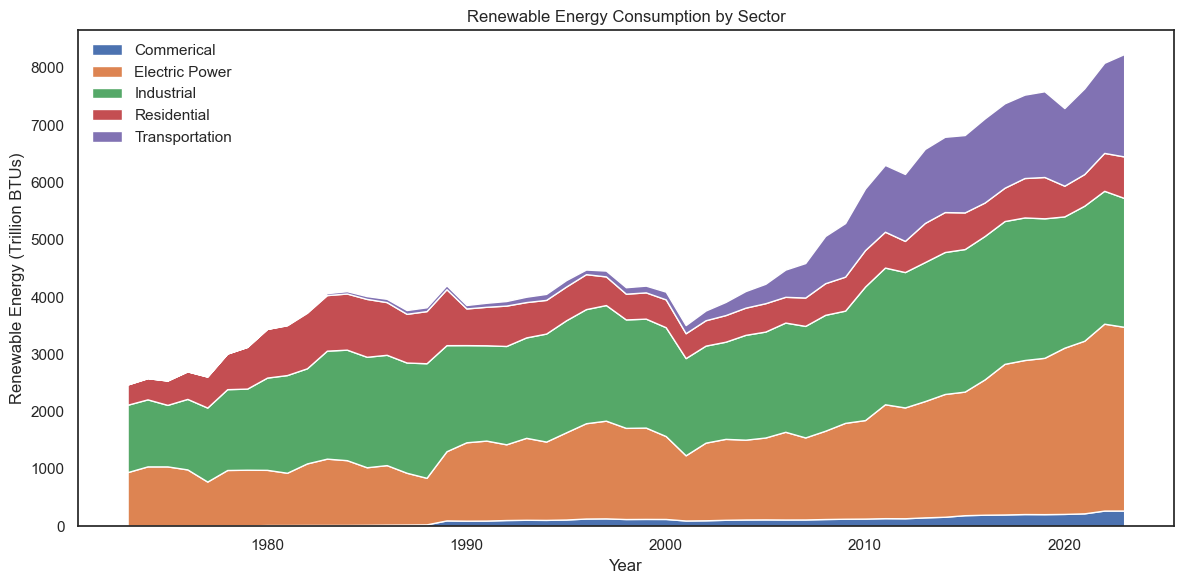

In [16]:
# Prepare data for stackplot
years = df_yr['Year'].unique()
sectors = df_yr['Sector'].unique()
data = {sector: df_yr[df_yr['Sector'] == sector]['Total Renewable Energy'].values for sector in sectors}

# Create stackplot
plt.figure(figsize=(12, 6))
plt.stackplot(years, data.values(), labels=data.keys())
plt.title('Renewable Energy Consumption by Sector')
plt.xlabel('Year')
plt.ylabel('Renewable Energy (Trillion BTUs)')
legend = plt.legend(loc='upper left')
legend.get_frame().set_edgecolor('none') 
legend.get_frame().set_facecolor('none')
plt.tight_layout()
plt.show()

### Observations
- Electric power and industrial have been the predominant sectors since 1973. Electric power had a large drop around the year 2000, but has since been on a steady upward trajectory. Electric power surpassed industrial in 2017 to become the largest consuming sector.
- Renewable energy consumption by the transportation sector was low until 2000, after which consumption has been steadily increasing.  

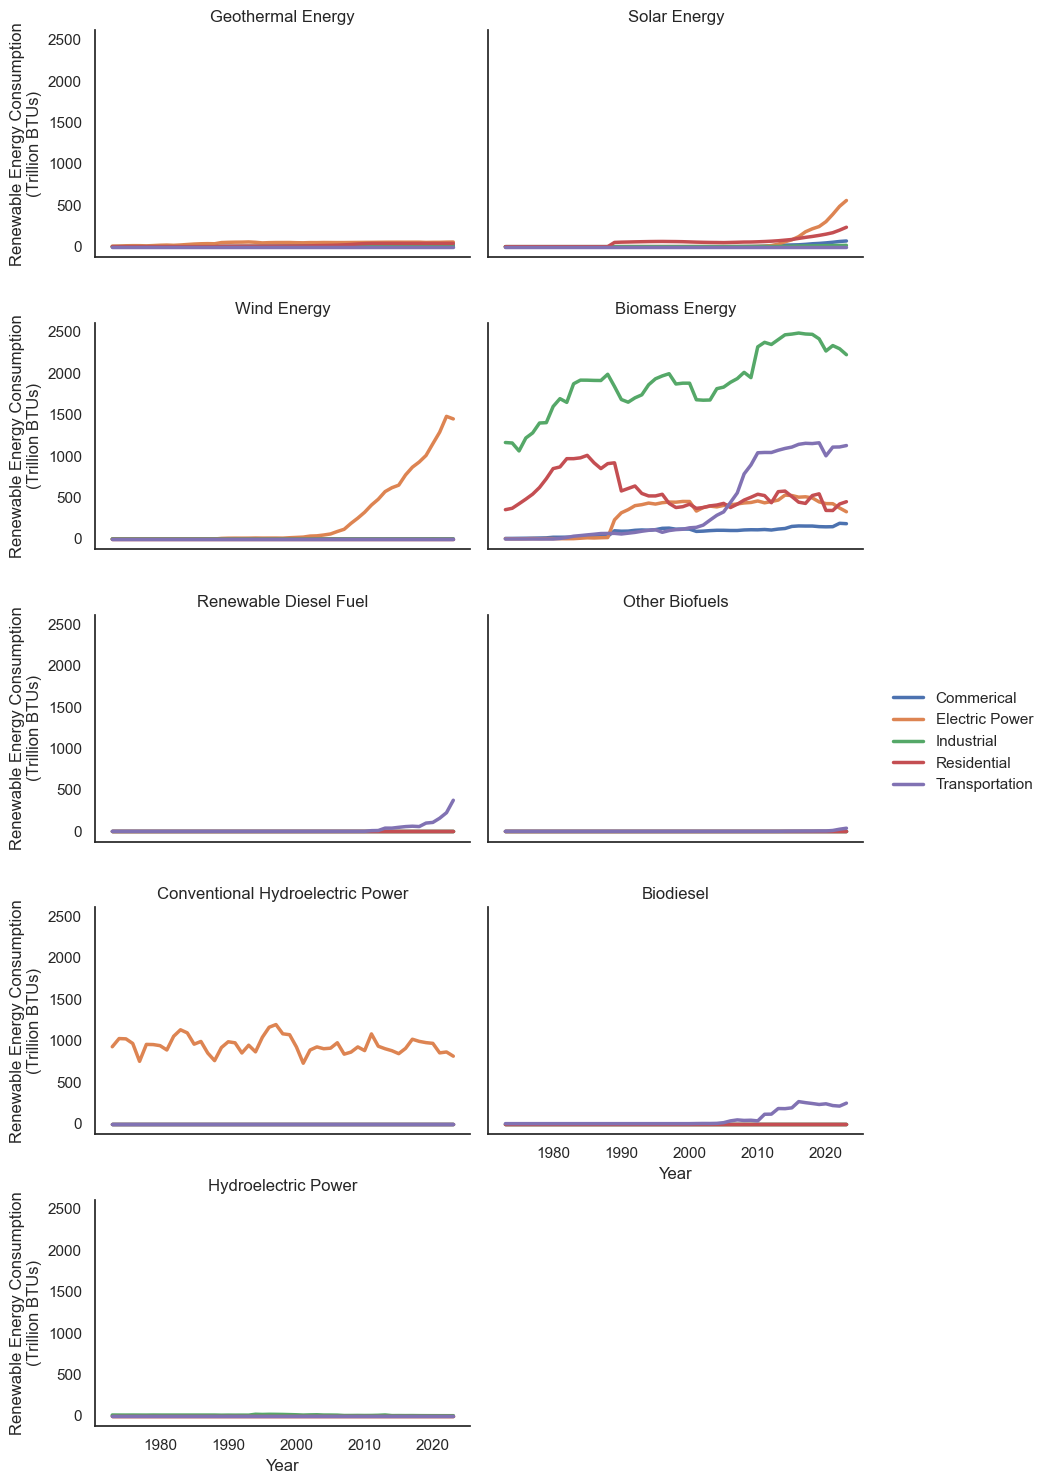

In [17]:
# Plot Total Renewable Energy Consumption by Type and Sector
g = sns.FacetGrid(df_yr_long, col='Renewable Energy Source', col_wrap=2, height=3, aspect=1.5)
g.map_dataframe(sns.lineplot, x='Year', y='Energy Consumption', hue='Sector', errorbar=None, linewidth=2.5)
g.set_axis_labels('Year', '\n'.join(wrap('Renewable Energy Consumption (Trillion BTUs)', width=30)))
g.set_titles(col_template='{col_name}')
g.add_legend()
g.tight_layout()

### Observations
- Most of the recent growth in solar energy has gone to electric power and, to a lesser extent, residential.
- The industrial sector is the largest consumer of biomass energy.
- Commercial use of biomass energy increased rapidly in the 2000s, but has plateued since 2010.
- Conventional hydroelectric power and wind energy are exclusively used for the generation of electric power.
- Conventional hydroelectric power is fluctuates year-over-year, but has remained within a similar range since 1973.

### Seasonality Analysis
To examine seasonality in renewable energy consumption, the data will first be normalized according to the mean energy consumption per year (separately for each energy source). This will remove noise due to year-over-year differences in consumption, and make seasonality trends clearer.

In [18]:
# Prepare and normalize data for seasonality plot

# Sum across sectors for each month
df_long = df.groupby(['Year','Month']).sum().reset_index()

# Melt data to bring all energy sources into one column
df_long = pd.melt(df_long,
                    id_vars=['Year','Month'],
                    value_vars=total_cols,
                    var_name='Renewable Energy Source',
                    value_name='Energy Consumption')
mean_per_year = df_long.groupby(['Year','Renewable Energy Source'])['Energy Consumption'].transform('mean')
df_long['Energy Consumption Normalized'] = df_long['Energy Consumption'] / mean_per_year

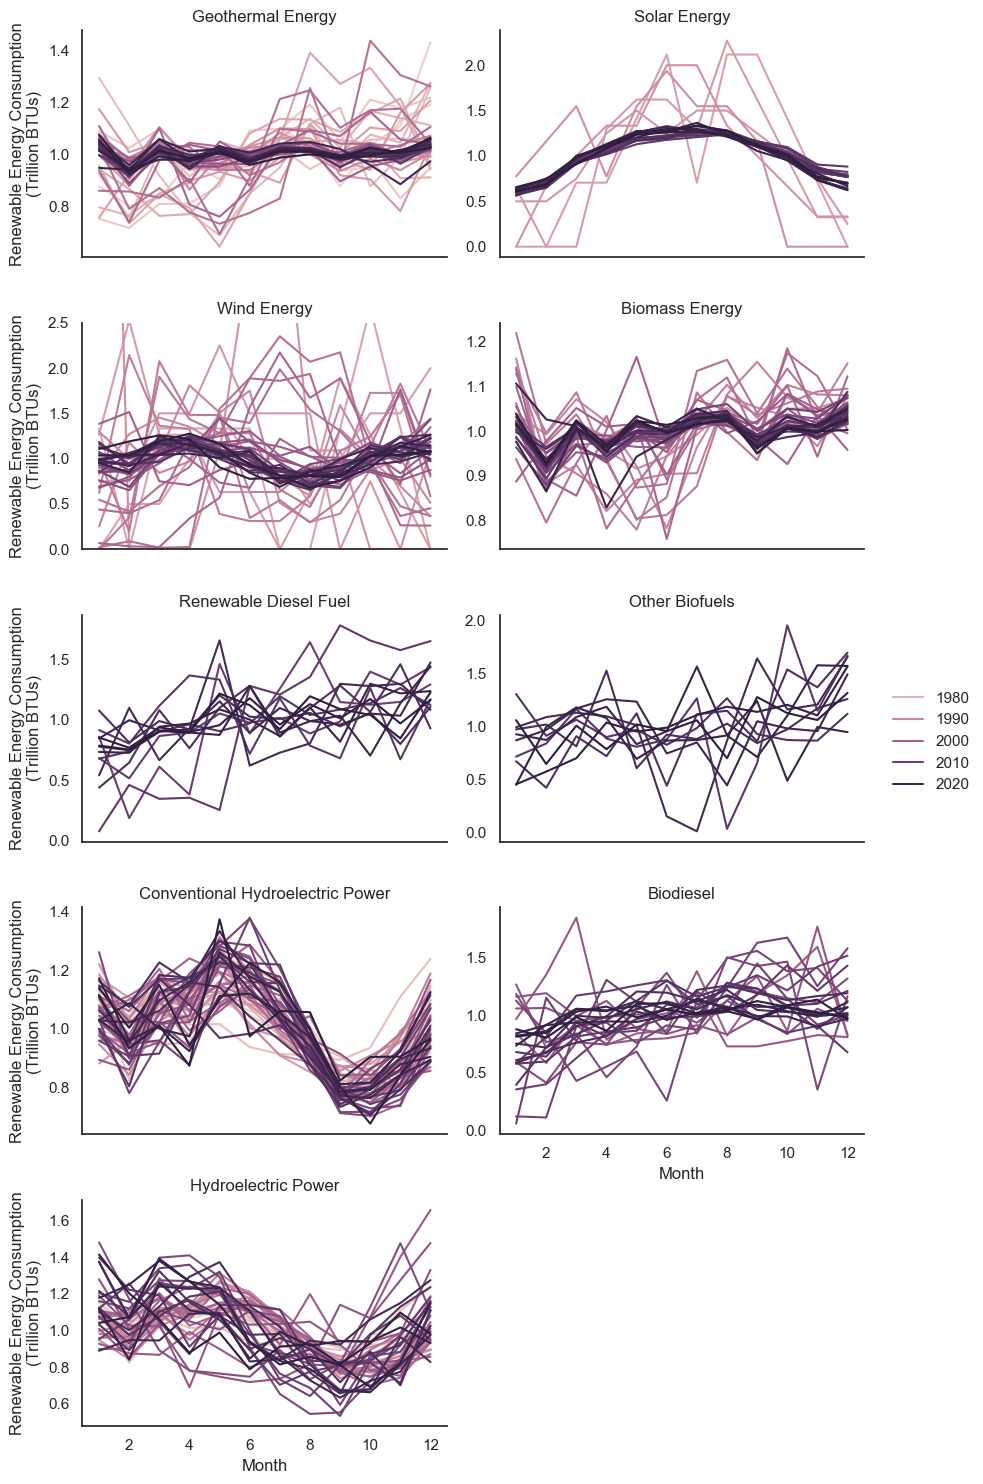

In [19]:
# Plot Seasonality in Energy Consumption by Source
g = sns.FacetGrid(df_long, col='Renewable Energy Source', col_wrap=2, height=3, aspect=1.5, sharey=False)
g.map_dataframe(sns.lineplot, x='Month', y='Energy Consumption Normalized', hue='Year', errorbar=None)

# Set y-axis limit for Wind Energy due to outlier
for ax in g.axes.flat:
    if ax.get_title() == 'Renewable Energy Source = Wind Energy':
        ax.set_ylim(0, 2.5)

g.set_axis_labels('Month', '\n'.join(wrap('Renewable Energy Consumption (Trillion BTUs)', width=30)))
g.set_titles(col_template='{col_name}')
g.add_legend()
g.tight_layout()

### Observations
- Seasonality data is much noisier for geothermal, solar, and wind energy before the year 2000, possibly because these sources and associated technologies were not as well-established.
- Solar, wind, hydroelectric power exhibit strong seasonality, corresponding to seasonal weather patterns.
